**Project Proposal**
-

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**(1) Data Description:**
- 
**Datasets**

- Two datasets are provided for this project, *players.csv* and *sessions.csv*.
- Players.csv dataset consists of 196 players and 7 columns. Sessions.csv dataset consists of 1,535 sessions and 5 columns.

**Variables**

*players.csv*
- experience: a categorical factor variable on a player's experience.
- subscribe: a logical variable if a player is subscribed.
- hashedEmail: a string variable that contains the player's email.
- played_hours: a double variable that shows hours a player has played.
- name: a string variable that contains the player's name.
- gender: a categorical factor variable consisting of a player's gender.
- age: a numeric value containing the player's age.

*sessions.csv*
- hashedEmail: a string variable that contains the player's email address. Used as an identifier to determine player.
- start_time: a timestamp when the player first started playing.
- end_time: a timestamp when the player stopped playing.
- original_start_time: a numeric timestamp containing the original start time.
- original_end_time: a numeric timestamp containing the end start time.

**Summary Statistics**

*players.csv:*
- There are 35 beginner, 63 amateur, 36 regular, 48 veteran, and 55 pro players.
- 144 players are subscribed and 52 are not.
- Min playtime is 0 hours; max is 223.10 hours.
- Mean age is 21.1 years.
- There are 161 male, 37 female, 15 non-binary, 11 who preferred not to say, 2 agender, 6 two-spirited, and 2 other players.

**Data Issues**

- The age column has two missing variables.
- The summary statistics, like played_hours, are skewed, as there are many 0 hours played present.
- Original start time and original end time are not shown how they are calculated.
- Player experience is not reported on how it was collected.
  

**2) Questions:**
-

- The broad question is question number two.
- The specific question is can characteristics based on each player, like their age and experience level, predict how much time they will play (played_hours)?
- The response variable for this question is played_hours and the exploratory variables are experience, age, and gender.

**(3) Exploratory Data Analysis and Visualization:**
- 

In [4]:
players_originals <- read_csv("data/players.csv")
sessions_originals <- read_csv("data/sessions.csv")

players <- players_originals |>
    mutate(experience = as_factor(experience)) |>
    mutate(gender = as_factor(gender))

players_stats <- players |>
    summarize(mean_hours = mean(played_hours, na.rm = TRUE), 
              mean_age = mean(Age, na.rm = TRUE))

players_stats

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


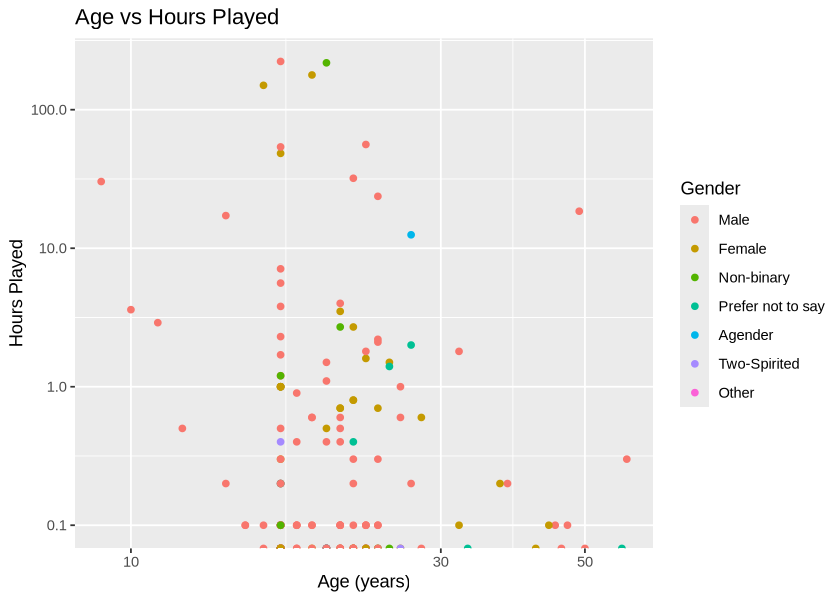

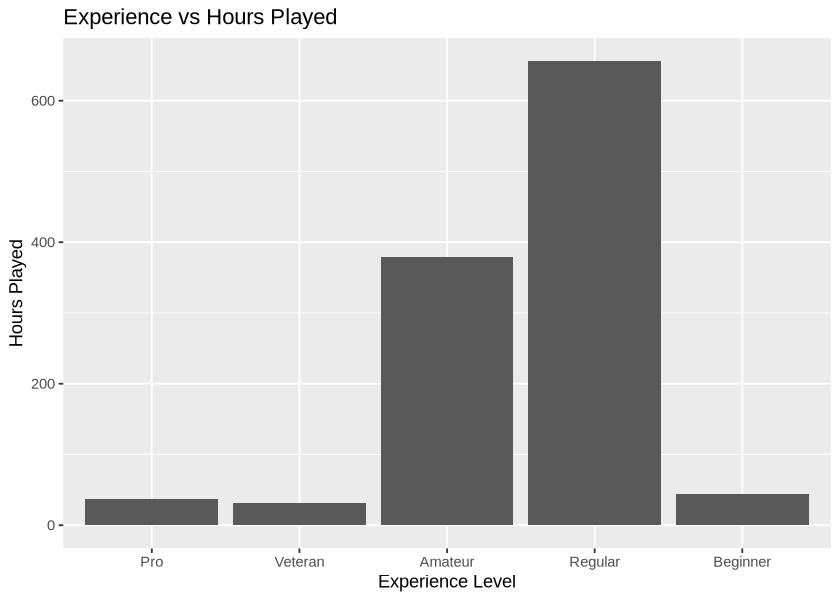

In [5]:
options(repr.plot.height = 5)
age_vs_time <- ggplot(players, aes(x=Age, y= played_hours, color = gender)) +
    geom_point() +
    labs(
        x = "Age (years)",
        y = "Hours Played",
        color = "Gender") +
    ggtitle("Age vs Hours Played") +
        scale_x_log10(labels = label_comma()) +
        scale_y_log10(labels = label_comma())
age_vs_time

experience_vs_time <- ggplot(players, aes(x=experience, y= played_hours)) +
    geom_bar(stat="identity") +
    labs(
        x = "Experience Level",
        y = "Hours Played") +
    ggtitle("Experience vs Hours Played")
experience_vs_time

- When we create the prediction model, we must account for the imbalance in data. The dataset has a large imbalance with genders, as "Male" dominates by over 100 players, and some genders have very minimal data. This is also present with other columns.

- Weak relationship between age and time played.

- Regular experience players have the least amount of players in the dataset; still have played for the most amount of time cumulatively.


**(4) Methods and Plan**
-

- A multiple linear regression model can be used.
- The response variable (played hours) is a numeric value and we are using multiple predictors like age and experience level together. Multiple linear regression is designed for this.
- We have to assume that the relationship between the response variable and the target variables is linear. We also assume that our predictors are not very linearly related, which would skew the regression coefficients for the best line.
- We need to account for outliers in the data set, especially where the playtime is 0 hours, as this will skew the line.
- Limitations include the time played. We need to add a transformation or selectively remove data.
- If the predictors and response variable are not linear, a different predictive method will need to be used.
- The data will be split 70/30 with the majority in the training set. Create the multiple linear regression model and calculate RMSE. Then we can create a knn  model and perform cross-validation and calculate RMSE and determine which model is better suited to answer our question.

**(5) GitHub Repository**
-
https://github.com/rajm0828/dsciproject